In [1]:
# Step 1: Import necessary libraries

##models
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import FeatureAgglomeration

## evaluation
from sklearn.metrics import rand_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## GaussianMixture Import
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage

## Mean-shift clustering
from sklearn.cluster import MeanShift, estimate_bandwidth
from mpl_toolkits.mplot3d import Axes3D

## Agglomerative Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

## DBScan
from sklearn.cluster import DBSCAN

##other stuff
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
# Step 2: Load the dataset
## read in data:
df = pd.read_csv(r"C:\Users\thoma\OneDrive - BCIT\BCIT Course\Year 2\Semester 2\BSYS 4005 - Applied AI Management Topics\Case #3\normalized-data.csv")

# Step 3: Preprocess the data (if necessary)
# You might need to handle missing values, categorical variables, etc.

# Step 4: Scale the features (if necessary)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['id']))

# K-Mean

In [3]:
# Step 5: Apply K-means clustering algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)
df['cluster'] = kmeans.labels_

C:\Users\thoma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


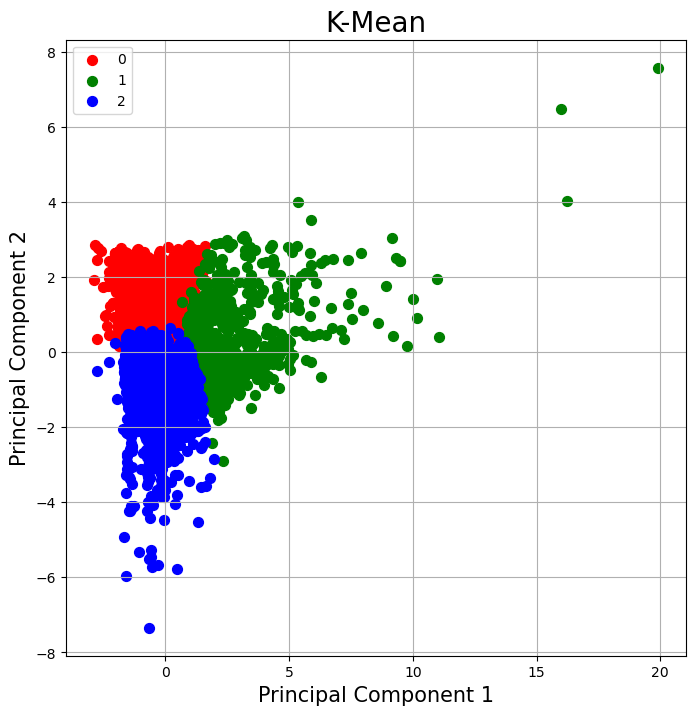

In [4]:
# Step 6: Visualize the clusters
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_features)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

finalDf = pd.concat([principalDf, df[['cluster']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('K-Mean', fontsize = 20)
targets = [0, 1, 2]  # Assuming 3 clusters
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Step 7: Interpret the results
plt.show()


In [5]:
# Step 8: Find the middle point of each cluster (centroid)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)  # Transform centroids back to original scale

# Print centroids
for i, centroid in enumerate(centroids):
    print(f"Centroid of cluster {i}: {centroid}")


Centroid of cluster 0: [  1.45615716   1.18854816   9.65117393   1.26257786 142.12314327
   4.98466699   1.57374221   3.46909439 165.9501677 ]
Centroid of cluster 1: [  3.7629548    2.46196251   8.73980154   1.01212789 437.73098126
  28.90187431   3.56761852   2.14994487 183.63836825]
Centroid of cluster 2: [  1.668185     1.11107218   9.45444989   1.2067274  148.07498248
  74.9614576    4.73906797   1.95550105 217.24702172]


# GaussianMixture

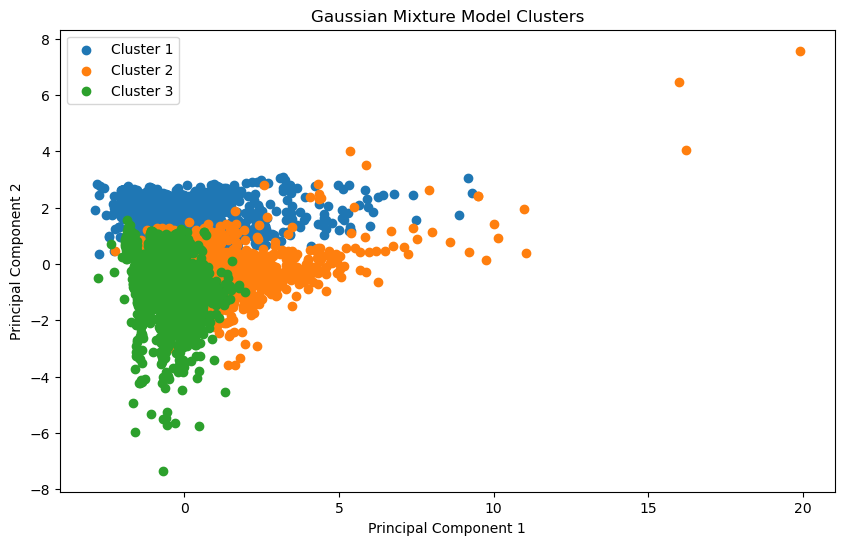

In [6]:
# Fit Gaussian Mixture Model
n_components = 3  # You can adjust this parameter based on your analysis
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(scaled_features)

# Predict clusters
clusters = gmm.predict(scaled_features)

# Visualize clusters
# Apply PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Plot clusters
plt.figure(figsize=(10, 6))
for i in range(n_components):
    plt.scatter(principal_components[clusters == i, 0], principal_components[clusters == i, 1], label=f'Cluster {i+1}')
plt.title('Gaussian Mixture Model Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Agglomerative Hierarchical Clustering

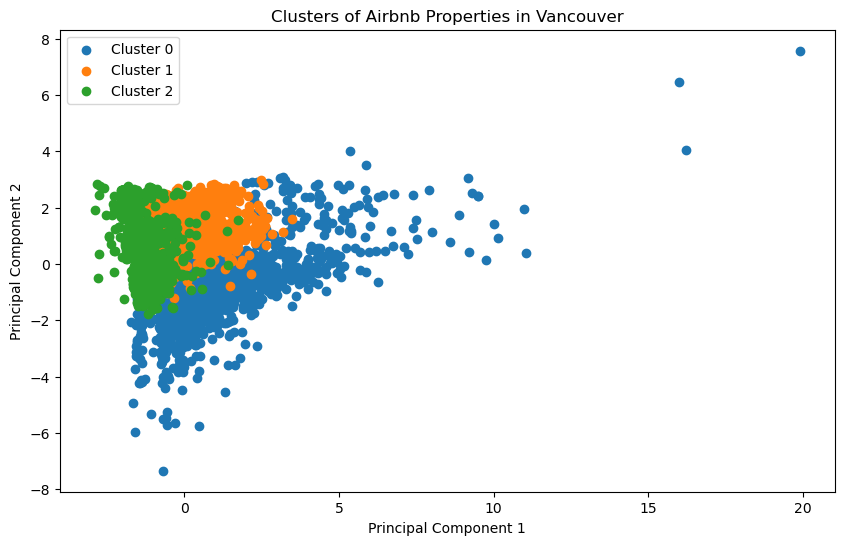

In [7]:
# Step 5: Apply Agglomerative Hierarchical Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
df['cluster'] = agg_cluster.fit_predict(scaled_features)

# Step 6: Visualize the clusters
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_features)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

finalDf = pd.concat([principalDf, df[['cluster']]], axis=1)

n_clusters = 3
# Plot clusters
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.scatter(finalDf[finalDf['cluster'] == cluster]['PC1'], 
                finalDf[finalDf['cluster'] == cluster]['PC2'], 
                label=f'Cluster {cluster}')
plt.title('Clusters of Airbnb Properties in Vancouver')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

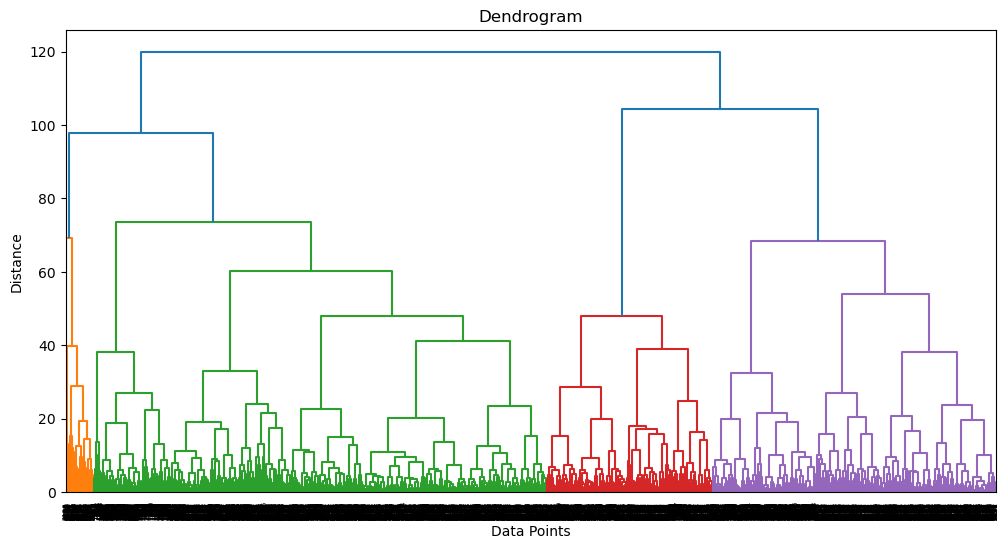

In [8]:
# Step 6: Plot the corresponding dendrogram
plt.figure(figsize=(12, 6))
plt.title('Dendrogram')
linkage_matrix = linkage(scaled_features, method='ward')  # Calculate the linkage matrix using Ward's method
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


# DBScan

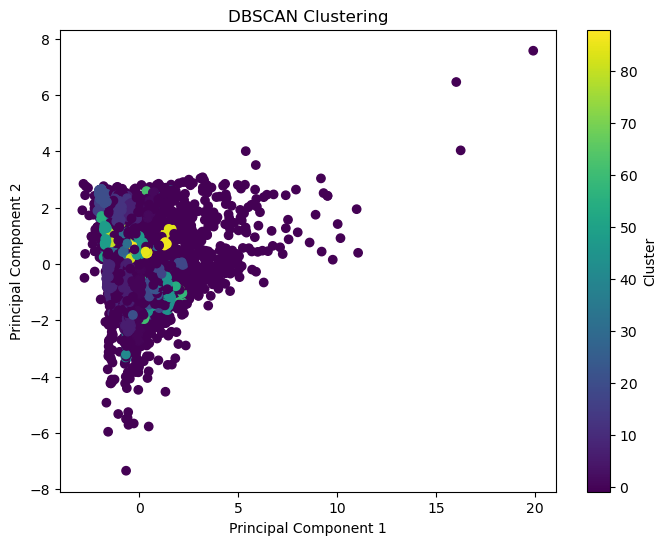

In [9]:
# Step 5: Model training
# Hyperparameters for DBSCAN
eps = 0.5  # epsilon
min_samples = 5

# Train DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(scaled_features)

# Step 6: Visualization
# You may need to reduce dimensionality for visualization. Here, we use PCA for dimensionality reduction.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

C:\Users\thoma\AppData\Local\Temp\ipykernel_10412\1902372966.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(finalDf.loc[indicesToKeep, 'PC1']


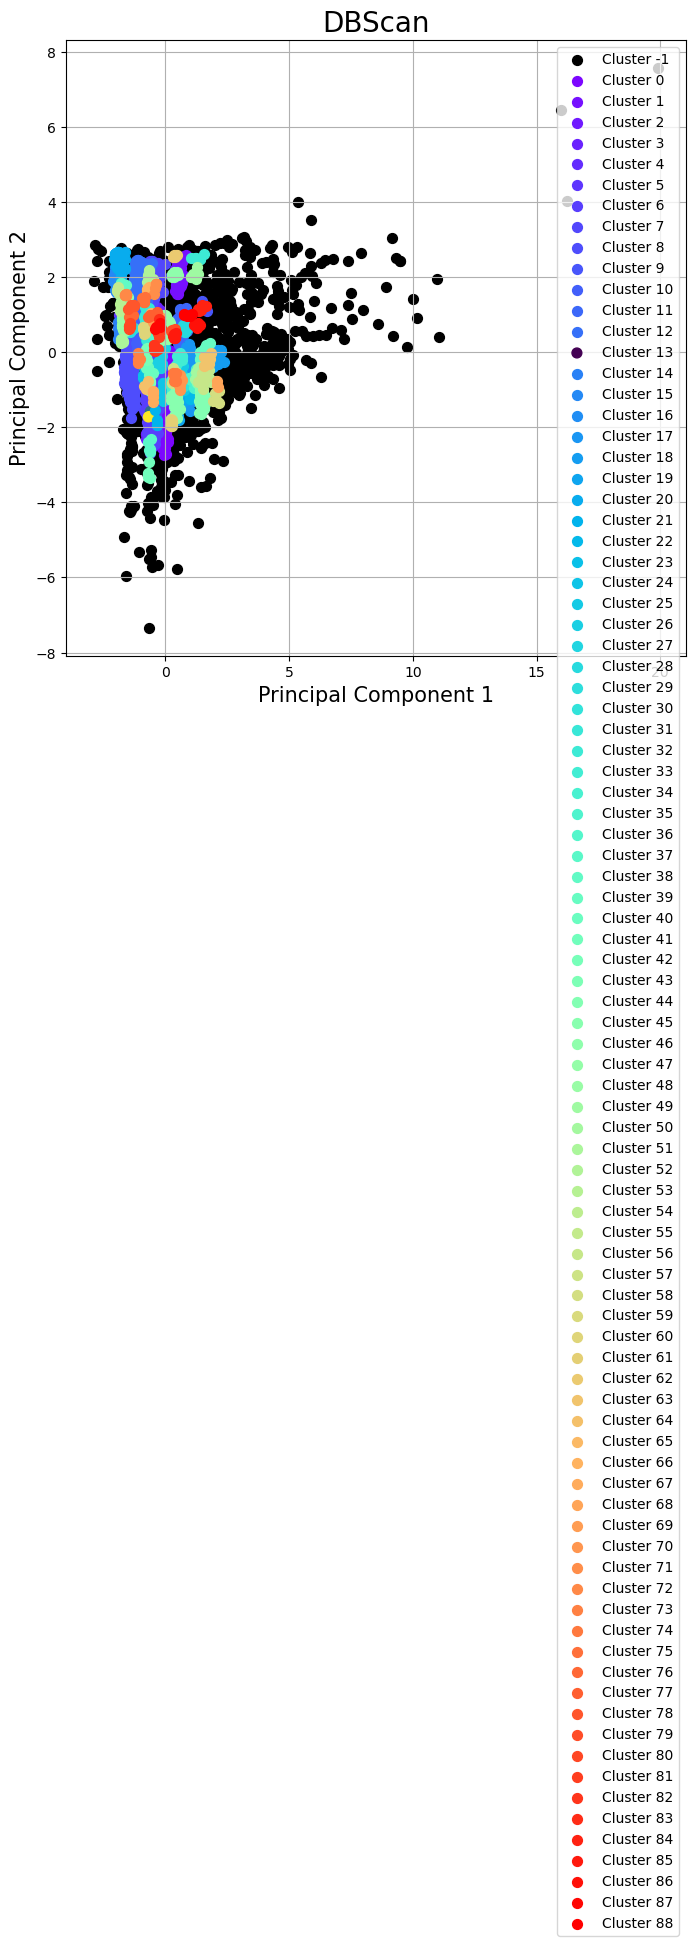

In [10]:
# Step 5: Apply DBSCAN clustering algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster'] = dbscan.fit_predict(scaled_features)

# Step 6: Visualize the clusters
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_features)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

finalDf = pd.concat([principalDf, df[['cluster']]], axis=1)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('DBScan', fontsize=20)

# Plot data points
unique_clusters = np.unique(df['cluster'])
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_clusters)))
for cluster, color in zip(unique_clusters, colors):
    if cluster == -1:
        # Outliers (noise points) are typically marked with -1
        color = 'black'
    indicesToKeep = df['cluster'] == cluster
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c=color
               , s=50
               , label=f'Cluster {cluster}')
ax.legend()
ax.grid()

# Step 7: Interpret the results
plt.show()

 # Mean-shift clustering

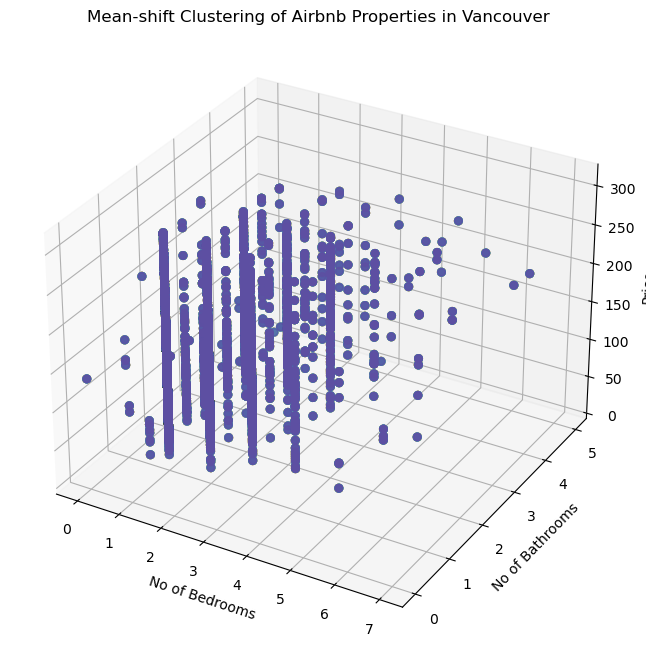

In [11]:
# Step 4: Perform Mean-shift clustering
X = df[['no_of_bed', 'no_of_bath', 'price']].values
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=len(X))
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters = len(np.unique(labels))

# Step 5: Visualize the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))

for cluster_center, color in zip(cluster_centers, colors):
    cluster_points = X[labels == labels[0]]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], color=color, marker='o', s=30)

ax.set_xlabel('No of Bedrooms')
ax.set_ylabel('No of Bathrooms')
ax.set_zlabel('Price')
ax.set_title('Mean-shift Clustering of Airbnb Properties in Vancouver')
plt.show()